In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow as tf

### Read the `heart.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Load the data into a Pandas DataFrame
heart_df = pd.read_csv(
    "drive/MyDrive/Resources/heart.csv")

# Display sample data
heart_df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


## Creating the labels set (`y`)  from the “output” column, and the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the y variable, the labels
y = heart_df["output"]

# Separate the X variable, the features
X = heart_df.drop(columns=['output'])

# X = heart_df.drop(columns=['age', 'trtbps', 'chol', 'fbs', 'restecg',
#      'slp',  'output'])

# X = heart_df.drop(columns=['cp', 'trtbps', 'chol', 'restecg', 'output'])

In [5]:
# Review the X variable DataFrame
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
#Check the balance of the labels values/target variable(y)
y.value_counts()

1    165
0    138
Name: output, dtype: int64

## Split the Data into Training and Testing Sets

In [7]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Split into testing and training sets using train_test_split with the test size 20% instead of 25%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state=1)

# Split into testing and training sets using train_test_split with the test size 30% instead of 25%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=1)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(303, input_shape=(X_train_scaled.shape[1],), activation='sigmoid'))


In [11]:
# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units= 10, activation='sigmoid'))

In [12]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 303)               4242      
                                                                 
 dense_1 (Dense)             (None, 10)                3040      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,293
Trainable params: 7,293
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
8/8 [==============================] - 2s 6ms/step - loss: 0.6759 - accuracy: 0.5463
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6644 - accuracy: 0.6652
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6290 - accuracy: 0.7181
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6183 - accuracy: 0.5991
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5893 - accuracy: 0.7093
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5644 - accuracy: 0.8150
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5456 - accuracy: 0.8150
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5234 - accuracy: 0.8062
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5076 - accuracy: 0.8238
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4877 - accuracy: 0.8370
Epoch 11/100
8/8 [===========

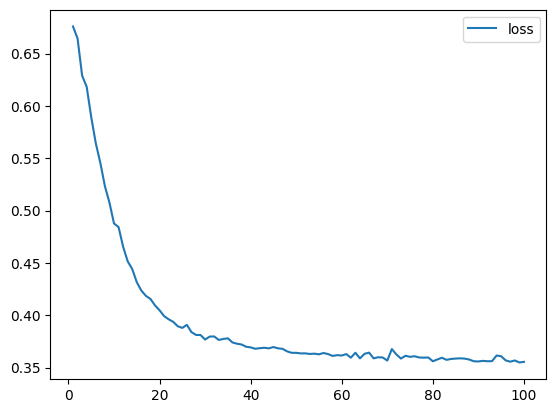

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

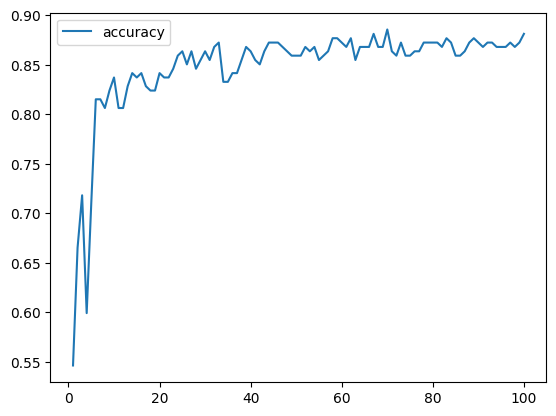

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 1s - loss: 0.3703 - accuracy: 0.8421 - 837ms/epoch - 279ms/step
Loss: 0.3702796995639801, Accuracy: 0.8421052694320679


In [19]:
# Export our model to HDF5 file
nn_model.save('heart.h5')